<a href="https://colab.research.google.com/github/atreyarawat123/trading-algos/blob/main/MovingAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving AMZN2.csv to AMZN2 (3).csv


In [ ]:
#Store the data into the df variable
df = pd.read_csv('AMZN2.csv')

In [ ]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-09,2019-08-09,1828.949951,1831.089966,1802.219971,1807.579956,1807.579956,2879800
2019-08-12,2019-08-12,1795.989990,1800.979980,1777.000000,1784.920044,1784.920044,2905500
2019-08-13,2019-08-13,1783.000000,1831.739990,1780.000000,1824.339966,1824.339966,3994000
2019-08-14,2019-08-14,1793.010010,1795.650024,1757.219971,1762.959961,1762.959961,4893600
2019-08-15,2019-08-15,1781.989990,1788.000000,1761.959961,1776.119995,1776.119995,3759100
...,...,...,...,...,...,...,...
2021-08-02,2021-08-02,3353.100098,3358.919922,3317.000000,3331.479980,3331.479980,3353900
2021-08-03,2021-08-03,3340.719971,3391.000000,3299.770020,3366.239990,3366.239990,4157300
2021-08-04,2021-08-04,3379.350098,3388.879883,3345.560059,3354.719971,3354.719971,2183900
2021-08-05,2021-08-05,3356.219971,3389.000000,3340.919922,3375.989990,3375.989990,2433500


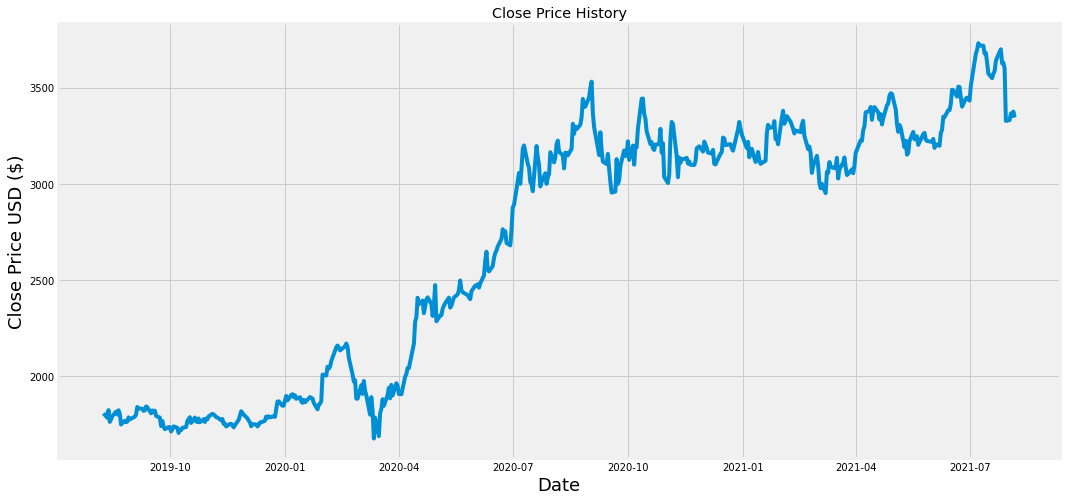

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:

#Calculate the Short/Fast Exponential Moving Average
ShortEMA = df.Close.ewm(span=7, adjust=False).mean() #AKA Fast moving average
#Calculate the Middle Exponential Moving Average
MiddleEMA = df.Close.ewm(span=30, adjust=False).mean() #AKA Slow moving average
#Calculate the Long/Slow Exponential Moving Average
LongEMA = df.Close.ewm(span=62, adjust=False).mean() #AKA Slow moving average

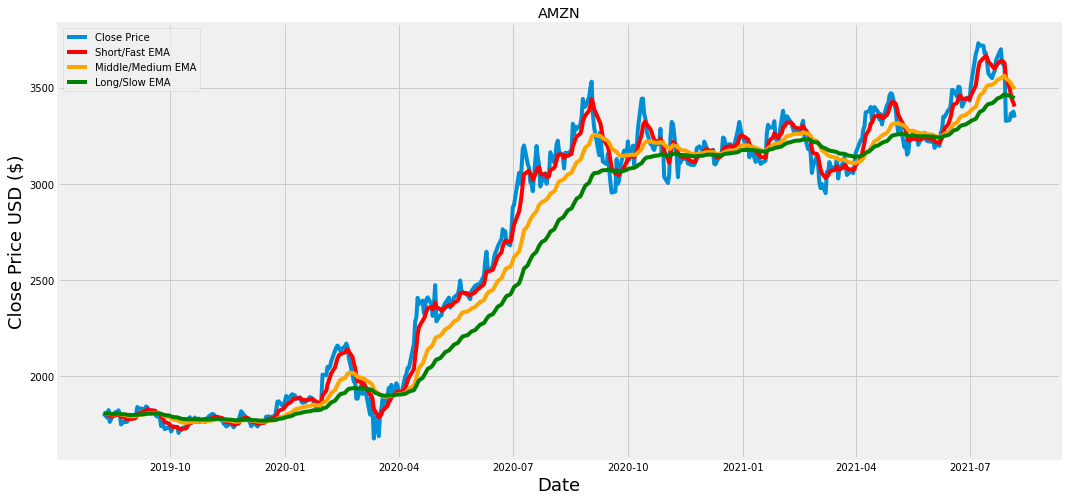

In [ ]:
#Visualize the closing price and the exponential moving averages
plt.figure(figsize=(16,8))
plt.title('AMZN')
plt.plot(df['Close'], label = 'Close Price')
plt.plot(ShortEMA, label='Short/Fast EMA', color = 'red')
plt.plot(MiddleEMA, label='Middle/Medium EMA', color = 'orange')
plt.plot(LongEMA, label='Long/Slow EMA', color = 'green')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Add the exponential moving averages to the data set
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA
#Show the data 
df


,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2019-08-09,2019-08-09,1828.949951,1831.089966,1802.219971,1807.579956,1807.579956,2879800,1807.579956,1807.579956,1807.579956
2019-08-12,2019-08-12,1795.989990,1800.979980,1777.000000,1784.920044,1784.920044,2905500,1801.914978,1806.118026,1806.860594
2019-08-13,2019-08-13,1783.000000,1831.739990,1780.000000,1824.339966,1824.339966,3994000,1807.521225,1807.293635,1807.415494
2019-08-14,2019-08-14,1793.010010,1795.650024,1757.219971,1762.959961,1762.959961,4893600,1796.380909,1804.433398,1806.004208
2019-08-15,2019-08-15,1781.989990,1788.000000,1761.959961,1776.119995,1776.119995,3759100,1791.315681,1802.606727,1805.055502
...,...,...,...,...,...,...,...,...,...,...
2021-08-02,2021-08-02,3353.100098,3358.919922,3317.000000,3331.479980,3331.479980,3353900,3496.701655,3532.905600,3457.977435
2021-08-03,2021-08-03,3340.719971,3391.000000,3299.770020,3366.239990,3366.239990,4157300,3464.086239,3522.152980,3455.065135
2021-08-04,2021-08-04,3379.350098,3388.879883,3345.560059,3354.719971,3354.719971,2183900,3436.744672,3511.350851,3451.879575
2021-08-05,2021-08-05,3356.219971,3389.000000,3340.919922,3375.989990,3375.989990,2433500,3421.556002,3502.617892,3449.470382


In [ ]:
#Create a function to buy and sell the stock (The trading strategy)
def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False
  for i in range(0,len(data)):
      if data['Middle'][i] < data['Long'][i] and data['Middle'][i] > data['Short'][i] and flag_long == False and flag_short == False:
          buy_list.append(data['Close'][i])
          sell_list.append(np.nan)
          flag_short = True
      elif data['Middle'][i] > data['Long'][i] and data['Middle'][i] < data['Short'][i] and flag_short == False and flag_long == False:
          buy_list.append(data['Close'][i])
          sell_list.append(np.nan)
          flag_long = True
      elif flag_short == True and data['Short'][i] > data['Middle'][i]:
          sell_list.append(data['Close'][i])
          buy_list.append(np.nan)
          flag_short = False
      elif flag_long == True and data['Short'][i] < data['Middle'][i]:
          sell_list.append(data['Close'][i])
          buy_list.append(np.nan)
          flag_long = False
      else:
          buy_list.append(np.nan)
          sell_list.append(np.nan)
  return (buy_list, sell_list)

In [ ]:
#Add the Buy and Sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] =buy_sell_function(df)[1]

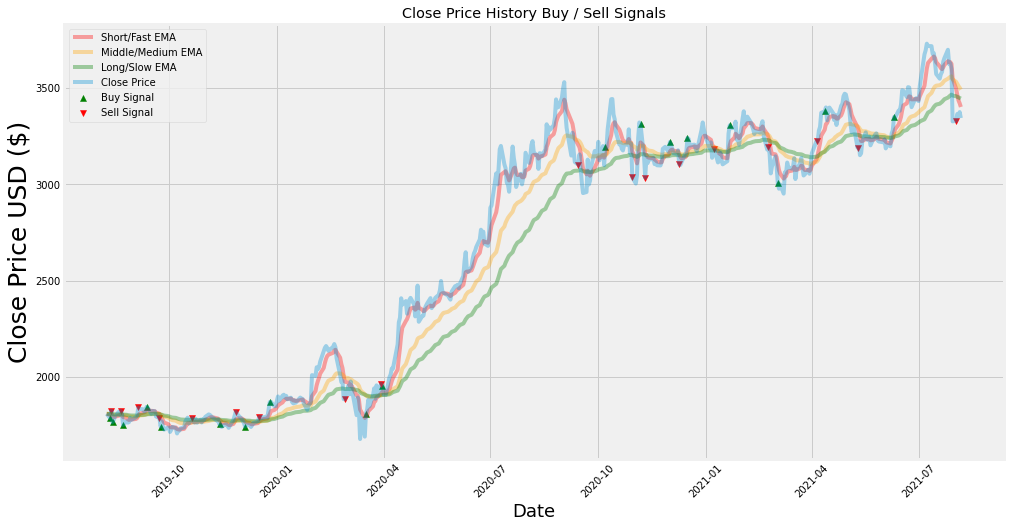

In [ ]:
# Visually Show The Stock buy and sell signals
#Create and plot the graph
plt.figure(figsize=(15,8)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(ShortEMA, label='Short/Fast EMA', color = 'red', alpha = 0.35)
plt.plot(MiddleEMA, label='Middle/Medium EMA', color = 'orange', alpha = 0.35)
plt.plot(LongEMA, label='Long/Slow EMA', color = 'green', alpha = 0.35)
plt.plot( df['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title('Close Price History Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=25)
plt.legend( loc='upper left')
plt.show()